In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Read the input file and check the data dimension

In [2]:
# reading the data
germandf = pd.read_csv('german_credit.csv')

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

#printing the shape of the data
germandf.shape
# there are 1000 rows and 21 columns in dataset

(1000, 21)

In [4]:
germandf.isnull().sum()
#there are no null columns in the dataframe

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [5]:
germandf.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Observation :
Mean, median , IQ 25%,75% are shown for the numerical columns
we can infer that average of age peple who has taken credit ranges frm 19 to 75.Age column is positively skewed.
The credit amount ranges between 250 to 18424.0.
The duration in months in which the credit has been granted ranges between 4 and 72. duration_in_months positively skewed as mean is greater than median.




In [6]:
germandf.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [7]:
#randomly selecting data for this use case to split it in 50% ratio without using random_state in the train_test_split
germansample , germansample2 = train_test_split(germandf, train_size=.50)

germansample


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
847,0,no checking account,24,existing credits paid back duly till now,car (new),1249,... < 100 DM,... < 1 year,4,male : married/widowed,...,2,real estate,28,none,own,1,skilled employee / official,1,none,yes
349,1,0 <= ... < 200 DM,9,critical account/ other credits existing (not ...,(vacation - does not exist?),1136,.. >= 1000 DM,.. >= 7 years,4,male : single,...,3,unknown / no property,32,none,for free,2,skilled employee / official,2,none,yes
259,0,no checking account,11,critical account/ other credits existing (not ...,domestic appliances,1154,100 <= ... < 500 DM,unemployed,4,female : divorced/separated/married,...,4,real estate,57,none,own,3,unskilled - resident,1,none,yes
367,0,< 0 DM,18,existing credits paid back duly till now,radio/television,3650,... < 100 DM,... < 1 year,1,female : divorced/separated/married,...,4,"if not A121/A122 : car or other, not in attrib...",22,none,rent,1,skilled employee / official,1,none,yes
832,1,< 0 DM,45,no credits taken/ all credits paid back duly,business,11816,... < 100 DM,.. >= 7 years,2,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",29,none,rent,2,skilled employee / official,1,none,yes
399,0,no checking account,24,critical account/ other credits existing (not ...,domestic appliances,1516,.. >= 1000 DM,1 <= ... < 4 years,4,female : divorced/separated/married,...,1,real estate,43,none,own,2,unskilled - resident,1,none,yes
867,0,no checking account,12,critical account/ other credits existing (not ...,radio/television,3331,... < 100 DM,.. >= 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,42,stores,own,1,skilled employee / official,1,none,yes
882,0,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),2181,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,36,none,own,2,skilled employee / official,1,none,yes
774,0,>= 200 DM / salary assignments for at least 1 ...,12,critical account/ other credits existing (not ...,car (new),1480,500 <= ... < 1000 DM,unemployed,2,male : single,...,4,unknown / no property,66,bank,for free,3,unemployed/ unskilled - non-resident,1,none,yes
94,0,0 <= ... < 200 DM,12,existing credits paid back duly till now,car (new),1318,.. >= 1000 DM,.. >= 7 years,4,male : single,...,4,real estate,54,none,own,1,skilled employee / official,1,"yes, registered under the customers name",yes


Considering german sample for ur use case

In [8]:
## printing the size of the new dataframe 
germansample.shape

(500, 21)

In [9]:
# Lets build a Ensemble model but need to modify the dataset first
germansample.info()
##datatype information for the sample data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 847 to 815
Data columns (total 21 columns):
default                       500 non-null int64
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object


In [10]:
#Finding unique values for categorical column
print('Unique values for foreign_worker is :',germansample['foreign_worker'].unique())
print('Unique values for account_check_status is :',germansample['account_check_status'].unique())
print('Unique values for credit_history is :',germansample['credit_history'].unique())
print('Unique values for purpose is :',germansample['purpose'].unique())
print('Unique values for savings is:',germansample['savings'].unique())
print('Unique values for present_emp_since is :',germansample['present_emp_since'].unique())
print('Unique values for personal_status_sex is :',germansample['personal_status_sex'].unique())
print('Unique values for other_debtors is :',germansample['other_debtors'].unique())
print('Unique values for property is :',germansample['property'].unique())
print('Unique values for other_installment_plans is :',germansample['other_installment_plans'].unique())
print('Unique values for housing is:',germansample['housing'].unique())
print('Unique values for job is:',germansample['job'].unique())
print('Unique values for telephone is:',germansample['telephone'].unique())


Unique values for foreign_worker is : ['yes' 'no']
Unique values for account_check_status is : ['no checking account' '0 <= ... < 200 DM' '< 0 DM'
 '>= 200 DM / salary assignments for at least 1 year']
Unique values for credit_history is : ['existing credits paid back duly till now'
 'critical account/ other credits existing (not at this bank)'
 'no credits taken/ all credits paid back duly'
 'delay in paying off in the past'
 'all credits at this bank paid back duly']
Unique values for purpose is : ['car (new)' '(vacation - does not exist?)' 'domestic appliances'
 'radio/television' 'business' 'car (used)' 'furniture/equipment'
 'education' 'retraining' 'repairs']
Unique values for savings is: ['... < 100 DM' '.. >= 1000 DM ' '100 <= ... < 500 DM'
 'unknown/ no savings account' '500 <= ... < 1000 DM ']
Unique values for present_emp_since is : ['... < 1 year ' '.. >= 7 years' 'unemployed' '1 <= ... < 4 years'
 '4 <= ... < 7 years']
Unique values for personal_status_sex is : ['male : ma

In [11]:
#categorizing categorical variables
germansample['telephone'].replace({'yes, registered under the customers name ':'Reg'},inplace =True)
germansample['job'].replace({'skilled employee / official':'Skill','unskilled - resident':'unskill','management/ self-employed/ highly qualified employee/ officer':'HighSkill','unemployed/ unskilled - non-resident':'unempl'},inplace =True)
germansample['personal_status_sex'].replace({'male : divorced/separated':'maleMDS','female : divorced/separated/married':'FemMDS','male : single':'malesing','male : married/widowed':'maleMW'},inplace =True)
germansample['property'].replace({'if not A121 : building society savings agreement/ life insurance':'Agree/Ins','if not A121/A122 : car or other, not in attribute 6':'carorother','real estate':'realest','unknown / no property':'noprop'},inplace =True)
germansample['present_emp_since'].replace({'1 <= ... < 4 years':'below4years','... < 1 year ':'below1year','.. >= 7 years':'above7years','4 <= ... < 7 years':'bet4and7'},inplace =True)
germansample['savings'].replace({'100 <= ... < 500 DM':'midrange','500 <= ... < 1000 DM ':'higherrange','... < 100 DM':'belowmin','.. >= 1000 DM ':'maximum','unknown/ no savings account':'nosav'},inplace =True)
germansample['account_check_status'].replace({'< 0 DM':'belowmin','no checking account':'Noacct','0 <= ... < 200 DM':'midrange','>= 200 DM / salary assignments for at least 1 year':'maxrag'},inplace =True)
germansample['credit_history'].replace({'existing credits paid back duly till now':'notpaid','delay in paying off in the past':'delay','no credits taken/ all credits paid back duly':'no/paidful','critical account/ other credits existing (not at this bank)':'nothere','all credits at this bank paid back duly':'paidduly'},inplace =True)
germansample['purpose'].replace({'radio/television':'RadTel','car (new)':'carnew','domestic appliances':'dom','car (used)':'carold','(vacation - does not exist?)':'novac'},inplace =True)

In [13]:
germansample['default'].value_counts()
#There are 350 non defaulters and 150defaulters

0    350
1    150
Name: default, dtype: int64

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [14]:
## using get dummmies to convert categorical variabe into numeric also using drop_first future of get dummies to drop the first column after converting into numeric
##this covers next question as well dropping the original variable. As the pandas does not store original variable after conversion using drop_first feature. This is clarified through support ticket
germansample.drop(['default'], axis = 1)
#germannewdf = pd.get_dummies(germansample, prefix_sep='_new_')
#shape of the dataset after converting to numerical value , including target variable
#print('shape of the dataset before using drop first is',germannewdf.shape)

#the size of the data set before using drop_first is 500*62 including target variable. 
# after dropping the first column the data size is reduced to 49.

germannewdf = pd.get_dummies(germansample, prefix_sep='_new_' , drop_first = True)
print('shape of the dataset after using drop first is',germannewdf.shape)

shape of the dataset after using drop first is (500, 49)


In [15]:
 germannewdf.dtypes

default                               int64
duration_in_month                     int64
credit_amount                         int64
installment_as_income_perc            int64
present_res_since                     int64
age                                   int64
credits_this_bank                     int64
people_under_maintenance              int64
account_check_status_new_belowmin     uint8
account_check_status_new_maxrag       uint8
account_check_status_new_midrange     uint8
credit_history_new_no/paidful         uint8
credit_history_new_nothere            uint8
credit_history_new_notpaid            uint8
credit_history_new_paidduly           uint8
purpose_new_business                  uint8
purpose_new_carnew                    uint8
purpose_new_carold                    uint8
purpose_new_dom                       uint8
purpose_new_education                 uint8
purpose_new_furniture/equipment       uint8
purpose_new_novac                     uint8
purpose_new_repairs             

In [16]:
germannewdf.head(10)
##data sample after converting to numerical value

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_new_belowmin,account_check_status_new_maxrag,...,property_new_realest,other_installment_plans_new_none,other_installment_plans_new_stores,housing_new_own,housing_new_rent,job_new_Skill,job_new_unempl,job_new_unskill,telephone_new_none,foreign_worker_new_yes
847,0,24,1249,4,2,28,1,1,0,0,...,1,1,0,1,0,1,0,0,1,1
349,1,9,1136,4,3,32,2,2,0,0,...,0,1,0,0,0,1,0,0,1,1
259,0,11,1154,4,4,57,3,1,0,0,...,1,1,0,1,0,0,0,1,1,1
367,0,18,3650,1,4,22,1,1,1,0,...,0,1,0,0,1,1,0,0,1,1
832,1,45,11816,2,4,29,2,1,1,0,...,0,1,0,0,1,1,0,0,1,1
399,0,24,1516,4,1,43,2,1,0,0,...,1,1,0,1,0,0,0,1,1,1
867,0,12,3331,2,4,42,1,1,0,0,...,0,0,1,1,0,1,0,0,1,1
882,0,30,2181,4,4,36,2,1,0,0,...,1,1,0,1,0,1,0,0,1,1
774,0,12,1480,2,4,66,3,1,0,1,...,0,0,0,0,0,0,1,0,1,1
94,0,12,1318,4,4,54,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
#scatter_matrix(germannewdf)
#plt.show()

In [19]:
germannewdf.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_new_belowmin,account_check_status_new_maxrag,...,property_new_realest,other_installment_plans_new_none,other_installment_plans_new_stores,housing_new_own,housing_new_rent,job_new_Skill,job_new_unempl,job_new_unskill,telephone_new_none,foreign_worker_new_yes
default,1.000000,0.196251,0.118508,0.075497,0.010595,-0.100000,-0.076100,0.051862,0.302368,-0.046362,...,-0.127221,-0.113970,0.077583,-0.133004,0.090852,-0.049718,-0.017110,0.055036,0.043928,0.111359
duration_in_month,0.196251,1.000000,0.609183,0.087811,0.031155,-0.015906,-0.002691,0.022722,0.069346,-0.099341,...,-0.259651,-0.060090,0.064132,-0.060076,-0.108198,0.048615,-0.015162,-0.184155,-0.154828,0.174950
credit_amount,0.118508,0.609183,1.000000,-0.274633,0.039120,0.036235,0.030365,-0.009465,0.031899,-0.127581,...,-0.256184,-0.047194,0.029911,-0.085362,-0.008634,-0.094802,0.002028,-0.166361,-0.264793,0.114674
installment_as_income_perc,0.075497,0.087811,-0.274633,1.000000,0.020038,0.016789,-0.025055,-0.006540,0.060989,-0.012840,...,0.000605,-0.003308,0.018477,0.019291,-0.061387,0.001941,-0.057737,-0.023061,0.031298,0.118069
present_res_since,0.010595,0.031155,0.039120,0.020038,1.000000,0.280388,0.082402,-0.019639,0.050986,0.000411,...,-0.124087,-0.013025,-0.094282,-0.356407,0.215790,0.002868,-0.048219,0.019003,-0.068311,0.053590
age,-0.100000,-0.015906,0.036235,0.016789,0.280388,1.000000,0.182055,0.079869,-0.069087,0.109404,...,0.021908,-0.027652,0.006665,0.025073,-0.204512,-0.137882,0.084245,0.027421,-0.117629,0.030714
credits_this_bank,-0.076100,-0.002691,0.030365,-0.025055,0.082402,0.182055,1.000000,0.071819,-0.012577,-0.030801,...,0.015206,-0.041962,-0.000417,-0.015206,0.000305,0.027355,0.060309,-0.006678,-0.018533,-0.009087
people_under_maintenance,0.051862,0.022722,-0.009465,-0.006540,-0.019639,0.079869,0.071819,1.000000,0.042774,-0.005473,...,0.004580,-0.095915,-0.023651,-0.064221,-0.003498,-0.074509,-0.034163,0.121642,0.084899,-0.102537
account_check_status_new_belowmin,0.302368,0.069346,0.031899,0.060989,0.050986,-0.069087,-0.012577,0.042774,1.000000,-0.160642,...,-0.044126,0.021740,-0.012083,-0.104413,0.121213,0.015696,-0.037737,0.030802,0.155501,-0.034783
account_check_status_new_maxrag,-0.046362,-0.099341,-0.127581,-0.012840,0.000411,0.109404,-0.030801,-0.005473,-0.160642,1.000000,...,0.068284,-0.052420,0.017737,-0.032193,-0.019993,-0.053483,0.172561,0.008244,0.039479,-0.071724


From the correlation it is observed that duration_in months and account_check_status< 0 DM are correlated with the target variable. Housing owned by self  and present residence negatively correlated with each other .credit amount and duration in month are highly correlated.

### Drop the original variables which are converted to dummy

In [20]:
#dropped the first column using drop_first feature of pandas. Pandas does not hold the original variable after conversion. Got this confirmed through support request


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [21]:
X = germannewdf.drop(['default'], axis = 1)
y = germannewdf['default']

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.30 , random_state = 99)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [23]:
# have built the model using the speicified parameters . Have not scaled the model as randomforest does not require scaling
from sklearn.preprocessing import StandardScaler


rf  = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rf.fit(X_train, y_train)
y_testpredict = rf.predict(X_test)
y_trainpredict = rf.predict(X_train)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [24]:
print('training accuracy score is',accuracy_score(y_train, y_trainpredict))
print('testing accuracy score is',accuracy_score(y_test, y_testpredict))


training accuracy score is 1.0
testing accuracy score is 0.7466666666666667


The training accuracy is 100% and the testing accuracy is 75.3 % . It varies from 67 to 78%. It varies based on the sample of data choosen for modelling from the original german_credit data set usig 50% split of training and test set

Confusion matrixs for testing dataset is


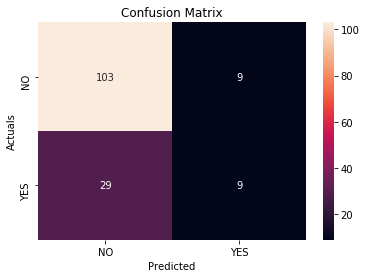

In [25]:
cm = confusion_matrix(y_test,y_testpredict)
print('Confusion matrixs for testing dataset is')
class_label = ["NO", "YES"]
germandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(germandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

The model is able to predict with 74.6% accuracy True negative 103 , true positives 9 , false positive 9 and false negative 29

### Q6 Show the list of the features importance( 1 Marks)

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [26]:
print('The important features are:')

print('Feaure importance is:')
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns))


The important features are:
Feaure importance is:
                                         Imp
duration_in_month                   0.078162
credit_amount                       0.105691
installment_as_income_perc          0.039232
present_res_since                   0.038084
age                                 0.087411
credits_this_bank                   0.020187
people_under_maintenance            0.017002
account_check_status_new_belowmin   0.069035
account_check_status_new_maxrag     0.008626
account_check_status_new_midrange   0.025960
credit_history_new_no/paidful       0.017962
credit_history_new_nothere          0.025467
credit_history_new_notpaid          0.017194
credit_history_new_paidduly         0.009304
purpose_new_business                0.011067
purpose_new_carnew                  0.030395
purpose_new_carold                  0.011640
purpose_new_dom                     0.019938
purpose_new_education               0.002159
purpose_new_furniture/equipment     0.002618
purpo

From the fature importance it is observed the credit amount is the most important feature followed by duration in months

In [27]:
# Use below values
num_folds = 10
seed = 77

In [28]:
#Validate the Random Forest model build above using k fold

In [29]:
#k-foldvalidation without stratification
scoring = 'accuracy'
kfold = KFold(num_folds, random_state = seed)
cv_results = cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print('scoring for 10 folds is',cv_results)

scoring for 10 folds is [0.71428571 0.65714286 0.74285714 0.71428571 0.68571429 0.77142857
 0.62857143 0.8        0.71428571 0.62857143]


In [30]:
#Calculate Mean score

In [31]:
print('mean score using 10 fold cross validation is')
cv_results.mean()

mean score using 10 fold cross validation is


0.7057142857142858

In [32]:
# Calculate score standard deviation using std()

In [33]:
print('standard deviation using 10 fold cross validation is')
cv_results.std()

standard deviation using 10 fold cross validation is


0.054285714285714305

# Q8 Print the confusion matrix( 1 Marks)

0.7466666666666667


Confusion matrixs for testing dataset is


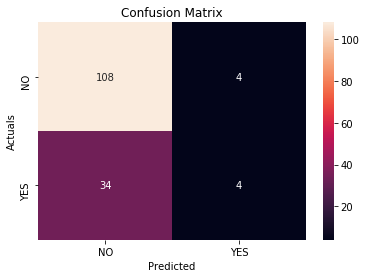

In [34]:
## finding confusion matrix using cross_val_predict for test data
y_prednew = cross_val_predict(rf, X_test, y_test, cv=kfold)
print(accuracy_score(y_test,y_prednew))
print("\n")
print('Confusion matrixs for testing dataset is')
cm1 = (confusion_matrix(y_test, y_prednew))
class_label = ["NO", "YES"]
germandf_cm = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(germandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()


print("\n")

The accuracy score using cross val score is 74.6% . From the confusion matrix found by cross val predict method, we can infer that with 74.6% accuracy model is able to predict TN : 96 , True positive : 17 false positive : 5 and false negative :32 records .The accuracy varies according to random_state

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [35]:
#recall or sensitivity  = TP / TP + FN , Precision = TP/ TP+FN , specifity = TN/ TN+FP

In [36]:
print('Sensitivity of the model is')
sensitivity = cm1[0][0]/(cm1[0][0]+cm1[1][0])
print(sensitivity)

Sensitivity of the model is
0.7605633802816901


In [37]:
print('Precision of the model is')
Precision = cm1[0][0]/(cm1[0][0] + cm1[0][1])
print(Precision)

Precision of the model is
0.9642857142857143


In [38]:
print("Transactions which were falsely classified as defaulters =  %.1f Percent" %(cm1[0][1]/ sum(sum(cm1))*100))
print("Transactions which were falsely classified as NOT-defaulter = %.1f Percent"%(cm1[1][0]/ sum(sum(cm1))*100))
print("Transactions which were truly classified as defaulter = %.1f Percent"% (cm1[1][1]/ sum(sum(cm1))*100))
print("Transactions which were truly classified as NOT-defaulter = %.1f Percent"% (cm1[0][0]/ sum(sum(cm1))*100))

Transactions which were falsely classified as defaulters =  2.7 Percent
Transactions which were falsely classified as NOT-defaulter = 22.7 Percent
Transactions which were truly classified as defaulter = 2.7 Percent
Transactions which were truly classified as NOT-defaulter = 72.0 Percent


In [39]:
#Specificity
print('Specificity is')
specificity  = cm1[0][0]/float(cm1[0][0] + cm1[0][1])
print(specificity)




Specificity is
0.9642857142857143


In [40]:
# fcore = 2 * Recall* Precision / (recall + Precision)
print('f1 score is')
print(2 *  sensitivity  *  Precision / (sensitivity + Precision))

f1 score is
0.8503937007874015


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [148]:
#Hint: Use roc_curve

threshold is
[1.778 0.778 0.74  0.726 0.622 0.578 0.566 0.54  0.51  0.504 0.5   0.496
 0.482 0.474 0.458 0.45  0.438 0.428 0.426 0.416 0.404 0.4   0.398 0.35
 0.348 0.338 0.324 0.32  0.312 0.308 0.306 0.304 0.296 0.292 0.288 0.282
 0.28  0.274 0.264 0.262 0.254 0.25  0.242 0.24  0.238 0.236 0.228 0.226
 0.222 0.218 0.216 0.208 0.198 0.196 0.192 0.176 0.172 0.146 0.142 0.136
 0.134 0.096 0.094 0.078 0.074 0.072 0.06  0.046 0.042]


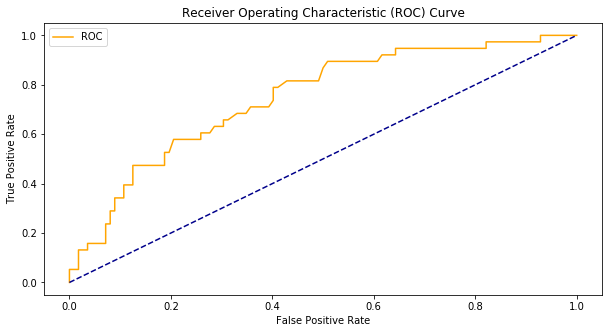

In [41]:

rfc_prob = rf.predict_proba(X_test)[:,1]


fig, ax = plt.subplots(1,1, figsize=(10,5))
fprRfc, tprRfc, thresholdsRfc = roc_curve(y_test, rfc_prob)
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

print('threshold is')
print(thresholdsRfc)
plt.plot(fprRfc, tprRfc, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [42]:
def evaluate_threshold(threshold):
    print('Senitivity',tprRfc[thresholdsRfc > threshold][-1])
    print('Specificity',1- fprRfc[thresholdsRfc > threshold][-1])

In [43]:
evaluate_threshold(0.5)

Senitivity 0.23684210526315788
Specificity 0.9196428571428571


In [44]:
evaluate_threshold(0.3)

Senitivity 0.6842105263157895
Specificity 0.6696428571428572


In [45]:
evaluate_threshold(0.1)

Senitivity 0.9736842105263158
Specificity 0.1785714285714286


# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [46]:
auc = roc_auc_score(y_test, rfc_prob)
print('AUC: %.2f' % auc)



AUC: 0.75


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
